#  Exploratory Data Analysis
This notebook highlights some simple, yet invaluable, exploratory data science techniques.

In [2]:
# Numpy and Pandas are data science heavy lifters
import numpy as np
import pandas as pd

In [5]:
# Read CSV Argus output from a file
filename = "data/argus-sample.csv"
df = pd.read_csv(filename)

In [6]:
# Shape is the number of rows and columns of the dataframe
df.shape

(559, 11)

In [7]:
# Head prints the first several rows of the dataframe
df.head(20)

,StartTime,Flgs,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,TotPkts,TotBytes,State
0,1.574787e+09,e,tcp,140.82.114.25,443,<?>,192.168.0.126,52622,4,330,CON
1,1.574787e+09,e,arp,192.168.0.100,NaN,who,192.168.0.200,NaN,3,180,INT
2,1.574787e+09,e,udp,192.168.0.191,54383,->,239.255.255.250,1900,3,648,INT
3,1.574787e+09,e,tcp,192.168.0.126,53167,->,40.77.226.250,443,19,6671,FIN
4,1.574787e+09,e,arp,192.168.0.101,NaN,who,192.168.0.200,NaN,5,300,INT
5,1.574787e+09,e,arp,192.168.0.102,NaN,who,192.168.0.200,NaN,3,180,INT
6,1.574787e+09,e,tcp,192.168.0.126,64295,<?>,17.248.134.154,443,8,2323,CON
7,1.574787e+09,e,tcp,192.168.0.126,65223,<?>,18.211.118.21,443,4,376,CON
8,1.574787e+09,e,udp,192.168.0.135,5353,->,224.0.0.251,5353,1,119,INT
9,1.574787e+09,e,udp,192.168.0.109,5353,->,224.0.0.251,5353,2,809,INT


In [8]:
# `describe` computes "5-number" summaries of the numerical fields
df.describe()

,StartTime,TotPkts,TotBytes
count,5.590000e+02,559.000000,5.590000e+02
mean,1.574787e+09,40.064401,2.918389e+04
std,1.626261e+01,204.917335,2.074253e+05
min,1.574787e+09,1.000000,4.600000e+01
25%,1.574787e+09,2.000000,2.265000e+02
50%,1.574787e+09,5.000000,5.540000e+02
75%,1.574787e+09,24.000000,8.400000e+03
max,1.574787e+09,3959.000000,4.067321e+06


In [9]:
# Get Unique Destination ports
df["Dport"].unique()

array(['52622', nan, '1900', '443', '5353', '10001', '17500', '53',
       '64251', '547', '0', '64761', '64210', '64212', '64211', '64208',
       '3702', '5223', '80', '170', '53166', '64116', '52901', '64243',
       '53141', '53015', '64788', '57621', '0x21ce', '9573', '52782',
       '53132', '52836', '64159'], dtype=object)

(array([133.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  13.3,  25.6,  37.9,  50.2,  62.5,  74.8,  87.1,  99.4,
        111.7, 124. ]),
 <a list of 10 Patch objects>)

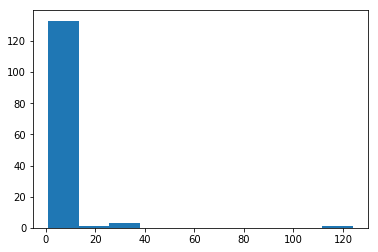

In [17]:
# Plot a Degree Distribution
import matplotlib.pyplot as plt
plt.hist(df.groupby("DstAddr").size())

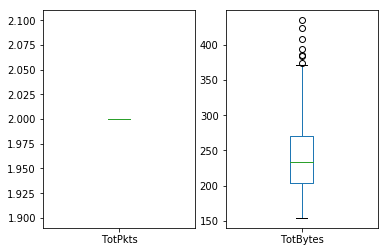

In [15]:
# Select only DNS flows and draw BoxPlots
dns = df[df["Dport"] == "53"]
dns[["TotPkts","TotBytes"]].plot(kind='box', subplots=True, layout=(
    1, 2), sharex=False, sharey=False)
plt.show()

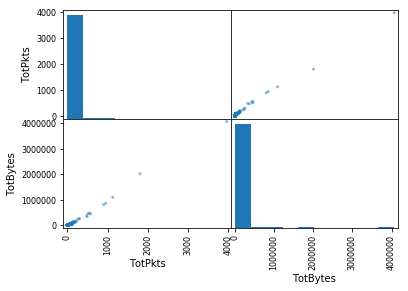

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[["TotPkts", "TotBytes"]])
plt.show()